In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

series = pd.read_csv('ewas correlation.csv', header=0, index_col=0)
print(series.describe())

       dengue_cases   dengue_GT
count    418.000000  418.000000
mean      17.581340   34.724880
std       21.977628   13.574853
min        0.000000    8.000000
25%        4.250000   25.000000
50%       11.000000   34.000000
75%       22.000000   43.000000
max      160.000000   78.000000


In [2]:
series.columns
series.tail()

,Date,dengue_cases,dengue_GT
Week,,,
414,1/12/2019-7/12/2019,24,12
415,8/12/2019-14/12/2019,8,12
416,15/12/2019-21/12/2019,24,12
417,22/12/2019-28/12/2019,26,11
418,29/12/2019-1/1/2020,0,9


<AxesSubplot:xlabel='Week'>

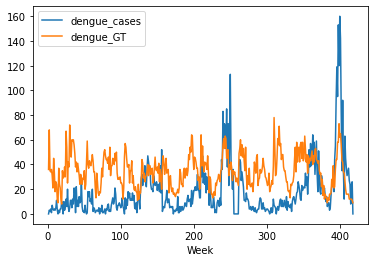

In [3]:
series.plot()

In [4]:
time_series1 = series["dengue_cases"]
type(time_series1)

pandas.core.series.Series

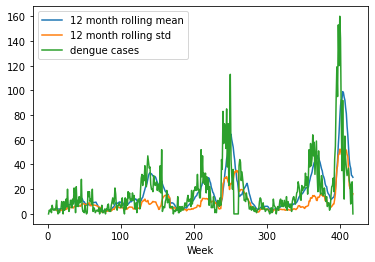

In [5]:
time_series1.rolling(12).mean().plot(label='12 month rolling mean')
time_series1.rolling(12).std().plot(label='12 month rolling std')
time_series1.plot(label='dengue cases')
plt.legend()

In [6]:
time_series2 = series["dengue_GT"]
type(time_series2)

pandas.core.series.Series

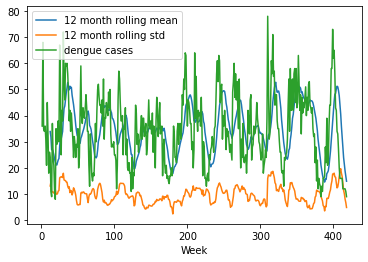

In [7]:
time_series2.rolling(12).mean().plot(label='12 month rolling mean')
time_series2.rolling(12).std().plot(label='12 month rolling std')
time_series2.plot(label='dengue cases')
plt.legend()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
decomp = seasonal_decompose(time_series1, model='additive', period=1)

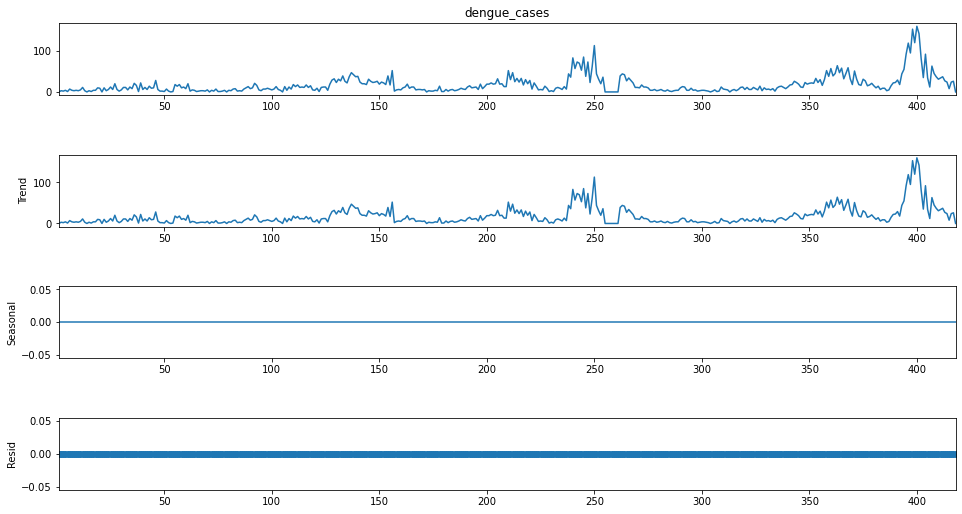

In [10]:
fig = decomp.plot()
fig.set_size_inches(15,8)

In [11]:
decomp2 = seasonal_decompose(time_series2, model='additive', period=1)

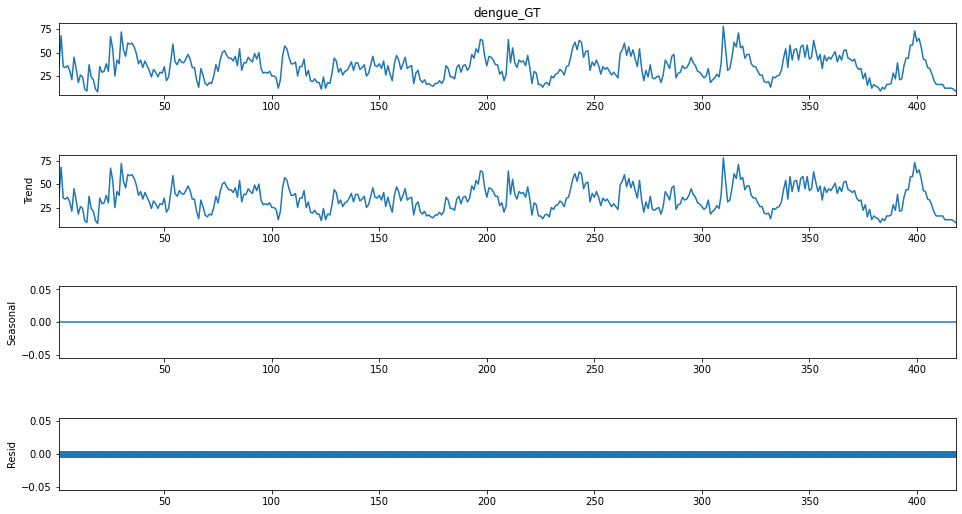

In [12]:
fig = decomp2.plot()
fig.set_size_inches(15,8)

In [13]:
import numpy as np

series['Time'] = np.arange(len(series.index))

series.head()

,Date,dengue_cases,dengue_GT,Time
Week,,,,
1,1/1/2012-7/1/2012,0,36,0
2,8/1/2012-14/1/2012,3,68,1
3,15/1/2012-21/1/2012,2,35,2
4,22/1/2012-28/1/2012,4,34,3
5,29/1/2012-4/2/2012,1,36,4


In [14]:
from matplotlib import style

print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Time series of dengue cases')

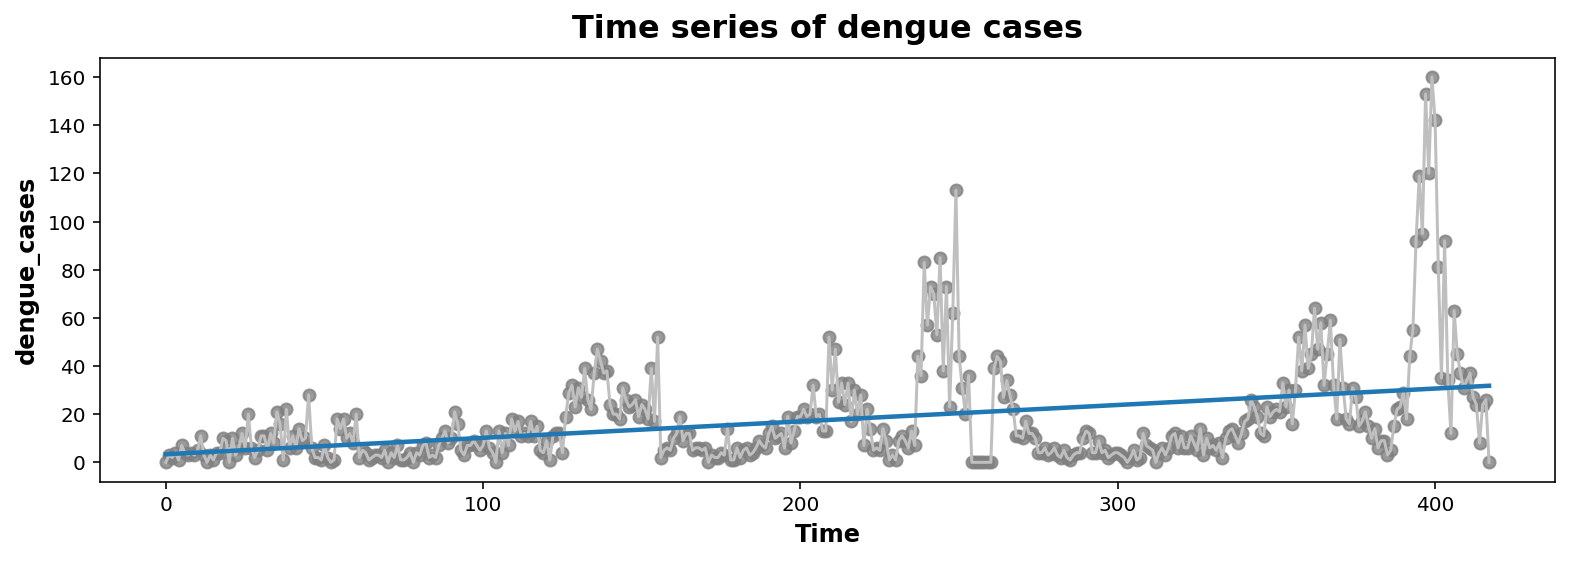

In [15]:
#another method
import seaborn as sns
#plt.style.use("_classic_test")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'dengue_cases', data=series, color='0.75')
ax = sns.regplot(x='Time', y='dengue_cases', data=series, ci=False, scatter_kws=dict(color='gray'))
ax.set_title('Time series of dengue cases')

In [16]:
series['Lag_1'] = series['dengue_cases'].shift(1)
series = series.reindex(columns=['dengue_cases', 'Lag_1'])

series.head()

,dengue_cases,Lag_1
Week,,
1,0,NaN
2,3,0.0
3,2,3.0
4,4,2.0
5,1,4.0


Text(0.5, 1.0, 'Lag plot of dengue cases')

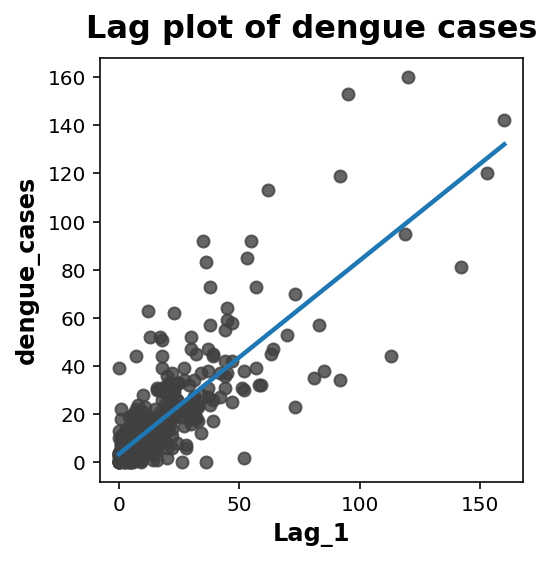

In [17]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='dengue_cases', data=series, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag plot of dengue cases')
#strong correlation between dengue cases and its lag, indication that prediction can lead to high dengue cases on day one usually mean high dengue cases on the next day.

# Moving Average

To see what kind of trend a time series might have, we can use a moving average plot. To compute a moving average of a time series, we compute the average of the values within a sliding window of some defined width. Each point on the graph represents the average of all the values in the series that fall within the window on either side. The idea is to smooth out any short-term fluctuations in the series so that only long-term changes remain.

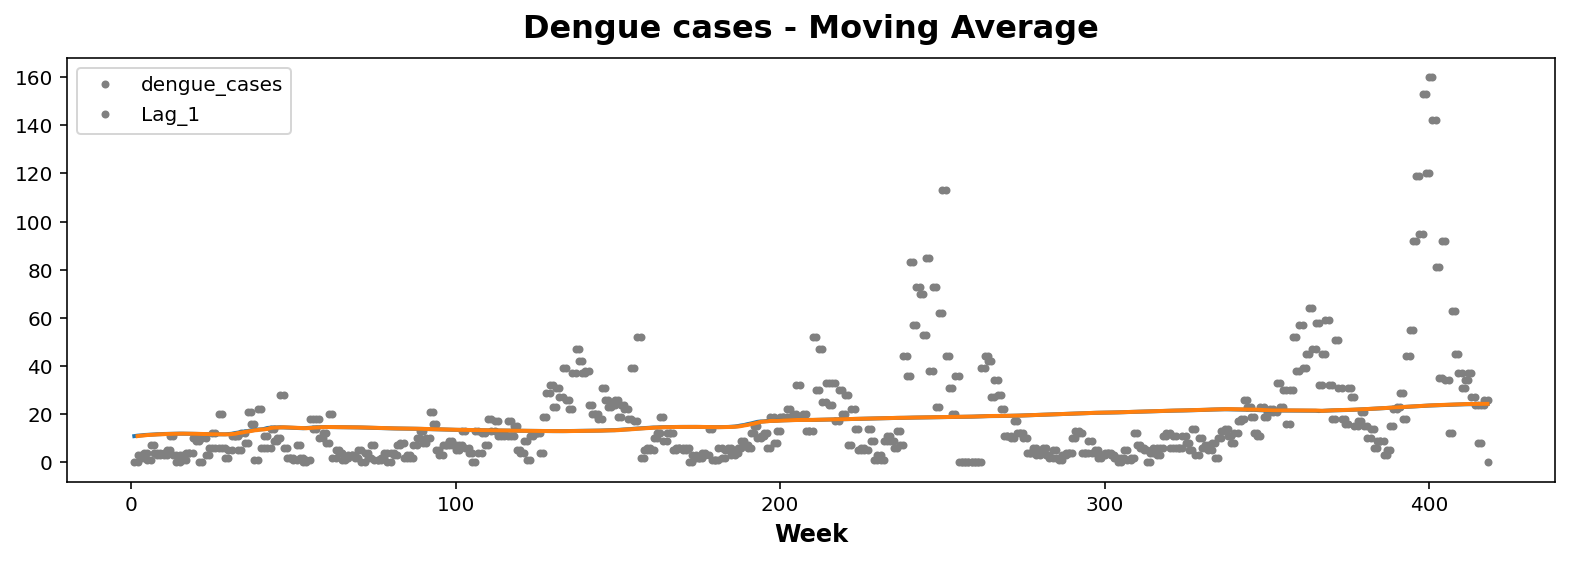

In [18]:
moving_average = series.rolling(
    window=418,       # 418 weeks window
    center=True,      # puts the average at the center of the window
    min_periods=209,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = series.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=2, title="Dengue cases - Moving Average", legend=False,
);